### Predicting House prices with Apache Spark

This dataset is not big. Using of Apache Spark is not necessary here. But we are going use it to show how can we use Pyspark to buil a machine learning model.

In [1]:
import pyspark
from pyspark.sql import SparkSession

In [2]:
spark=SparkSession.builder.appName('Practise').getOrCreate()

In [3]:
spark

In [4]:
df= spark.sql('''select 'spark' as hello''')
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [5]:
df=spark.read.csv('cal_housing.data')

In [6]:
df

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string]

In [7]:
df=spark.read.option('header','true').csv('cal_housing.data')

In [8]:
df

DataFrame[-122.230000: string, 37.880000: string, 41.000000: string, 880.000000: string, 129.000000: string, 322.000000: string, 126.000000: string, 8.325200: string, 452600.000000: string]

#### Understanding the Data Set

The California Housing data set appeared in a 1997 paper titled Sparse Spatial Autoregressions, written by Pace, R. Kelley and Ronald Barry and published in the Statistics and Probability Letters journal. The researchers built this data set by using the 1990 California census data.

The data contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). In this sample a block group on average includes 1425.5 individuals living in a geographically compact area.

These spatial data contain 20,640 observations on housing prices with 9 economic variables:

Longitude:refers to the angular distance of a geographic place north or south of the earth’s equator for each block group

Latitude :refers to the angular distance of a geographic place east or west of the earth’s equator for each block group

Housing Median Age:is the median age of the people that belong to a block group. Note that the median is the value that lies at the midpoint of a frequency distribution of observed values

Total Rooms:is the total number of rooms in the houses per block group

Total Bedrooms:is the total number of bedrooms in the houses per block group

Population:is the number of inhabitants of a block group

Households:refers to units of houses and their occupants per block group

Median Income:is used to register the median income of people that belong to a block group

Median House Value:is the dependent variable and refers to the median house value per block group

In [9]:
from pyspark.sql.types import*

In [10]:
schema=StructType([StructField("long", FloatType(), nullable=True),
                  StructField("lat", FloatType(), nullable=True),
                  StructField("medage", FloatType(), nullable=True),
                  StructField("totrooms", FloatType(), nullable=True),
                  StructField("totbdrms", FloatType(), nullable=True),
                  StructField("pop", FloatType(), nullable=True),
                  StructField("houshlds", FloatType(), nullable=True),
                   StructField("medinc", FloatType(), nullable=True),
                   StructField("medhv", FloatType(), nullable=True)
                  ])

In [11]:
df=spark.read.csv("cal_housing.data",schema)

In [12]:
df

DataFrame[long: float, lat: float, medage: float, totrooms: float, totbdrms: float, pop: float, houshlds: float, medinc: float, medhv: float]

In [13]:
df.show()

+-------+-----+------+--------+--------+------+--------+------+--------+
|   long|  lat|medage|totrooms|totbdrms|   pop|houshlds|medinc|   medhv|
+-------+-----+------+--------+--------+------+--------+------+--------+
|-122.23|37.88|  41.0|   880.0|   129.0| 322.0|   126.0|8.3252|452600.0|
|-122.22|37.86|  21.0|  7099.0|  1106.0|2401.0|  1138.0|8.3014|358500.0|
|-122.24|37.85|  52.0|  1467.0|   190.0| 496.0|   177.0|7.2574|352100.0|
|-122.25|37.85|  52.0|  1274.0|   235.0| 558.0|   219.0|5.6431|341300.0|
|-122.25|37.85|  52.0|  1627.0|   280.0| 565.0|   259.0|3.8462|342200.0|
|-122.25|37.85|  52.0|   919.0|   213.0| 413.0|   193.0|4.0368|269700.0|
|-122.25|37.84|  52.0|  2535.0|   489.0|1094.0|   514.0|3.6591|299200.0|
|-122.25|37.84|  52.0|  3104.0|   687.0|1157.0|   647.0|  3.12|241400.0|
|-122.26|37.84|  42.0|  2555.0|   665.0|1206.0|   595.0|2.0804|226700.0|
|-122.25|37.84|  52.0|  3549.0|   707.0|1551.0|   714.0|3.6912|261100.0|
|-122.26|37.85|  52.0|  2202.0|   434.0| 910.0|   4

In [14]:
df.show(5,vertical=True)

-RECORD 0------------
 long     | -122.23  
 lat      | 37.88    
 medage   | 41.0     
 totrooms | 880.0    
 totbdrms | 129.0    
 pop      | 322.0    
 houshlds | 126.0    
 medinc   | 8.3252   
 medhv    | 452600.0 
-RECORD 1------------
 long     | -122.22  
 lat      | 37.86    
 medage   | 21.0     
 totrooms | 7099.0   
 totbdrms | 1106.0   
 pop      | 2401.0   
 houshlds | 1138.0   
 medinc   | 8.3014   
 medhv    | 358500.0 
-RECORD 2------------
 long     | -122.24  
 lat      | 37.85    
 medage   | 52.0     
 totrooms | 1467.0   
 totbdrms | 190.0    
 pop      | 496.0    
 houshlds | 177.0    
 medinc   | 7.2574   
 medhv    | 352100.0 
-RECORD 3------------
 long     | -122.25  
 lat      | 37.85    
 medage   | 52.0     
 totrooms | 1274.0   
 totbdrms | 235.0    
 pop      | 558.0    
 houshlds | 219.0    
 medinc   | 5.6431   
 medhv    | 341300.0 
-RECORD 4------------
 long     | -122.25  
 lat      | 37.85    
 medage   | 52.0     
 totrooms | 1627.0   
 totbdrms 

In [15]:
df.printSchema()

root
 |-- long: float (nullable = true)
 |-- lat: float (nullable = true)
 |-- medage: float (nullable = true)
 |-- totrooms: float (nullable = true)
 |-- totbdrms: float (nullable = true)
 |-- pop: float (nullable = true)
 |-- houshlds: float (nullable = true)
 |-- medinc: float (nullable = true)
 |-- medhv: float (nullable = true)



In [16]:
df.columns

['long',
 'lat',
 'medage',
 'totrooms',
 'totbdrms',
 'pop',
 'houshlds',
 'medinc',
 'medhv']

#### Data Exploration

In [17]:
df.select(['long','lat','medage']).show(5)

+-------+-----+------+
|   long|  lat|medage|
+-------+-----+------+
|-122.23|37.88|  41.0|
|-122.22|37.86|  21.0|
|-122.24|37.85|  52.0|
|-122.25|37.85|  52.0|
|-122.25|37.85|  52.0|
+-------+-----+------+
only showing top 5 rows



In [18]:
df.describe().show(vertical=True)

-RECORD 0-----------------------
 summary  | count               
 long     | 20640               
 lat      | 20640               
 medage   | 20640               
 totrooms | 20640               
 totbdrms | 20640               
 pop      | 20640               
 houshlds | 20640               
 medinc   | 20640               
 medhv    | 20640               
-RECORD 1-----------------------
 summary  | mean                
 long     | -119.56970444871473 
 lat      | 35.63186143109965   
 medage   | 28.639486434108527  
 totrooms | 2635.7630813953488  
 totbdrms | 537.8980135658915   
 pop      | 1425.4767441860465  
 houshlds | 499.5396802325581   
 medinc   | 3.8706710030346416  
 medhv    | 206855.81690891474  
-RECORD 2-----------------------
 summary  | stddev              
 long     | 2.003531742932898   
 lat      | 2.135952380602968   
 medage   | 12.58555761211163   
 totrooms | 2181.6152515827944  
 totbdrms | 421.247905943133    
 pop      | 1132.46212176534    
 houshlds 

In [19]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   long      20640 non-null  float32
 1   lat       20640 non-null  float32
 2   medage    20640 non-null  float32
 3   totrooms  20640 non-null  float32
 4   totbdrms  20640 non-null  float32
 5   pop       20640 non-null  float32
 6   houshlds  20640 non-null  float32
 7   medinc    20640 non-null  float32
 8   medhv     20640 non-null  float32
dtypes: float32(9)
memory usage: 725.8 KB


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

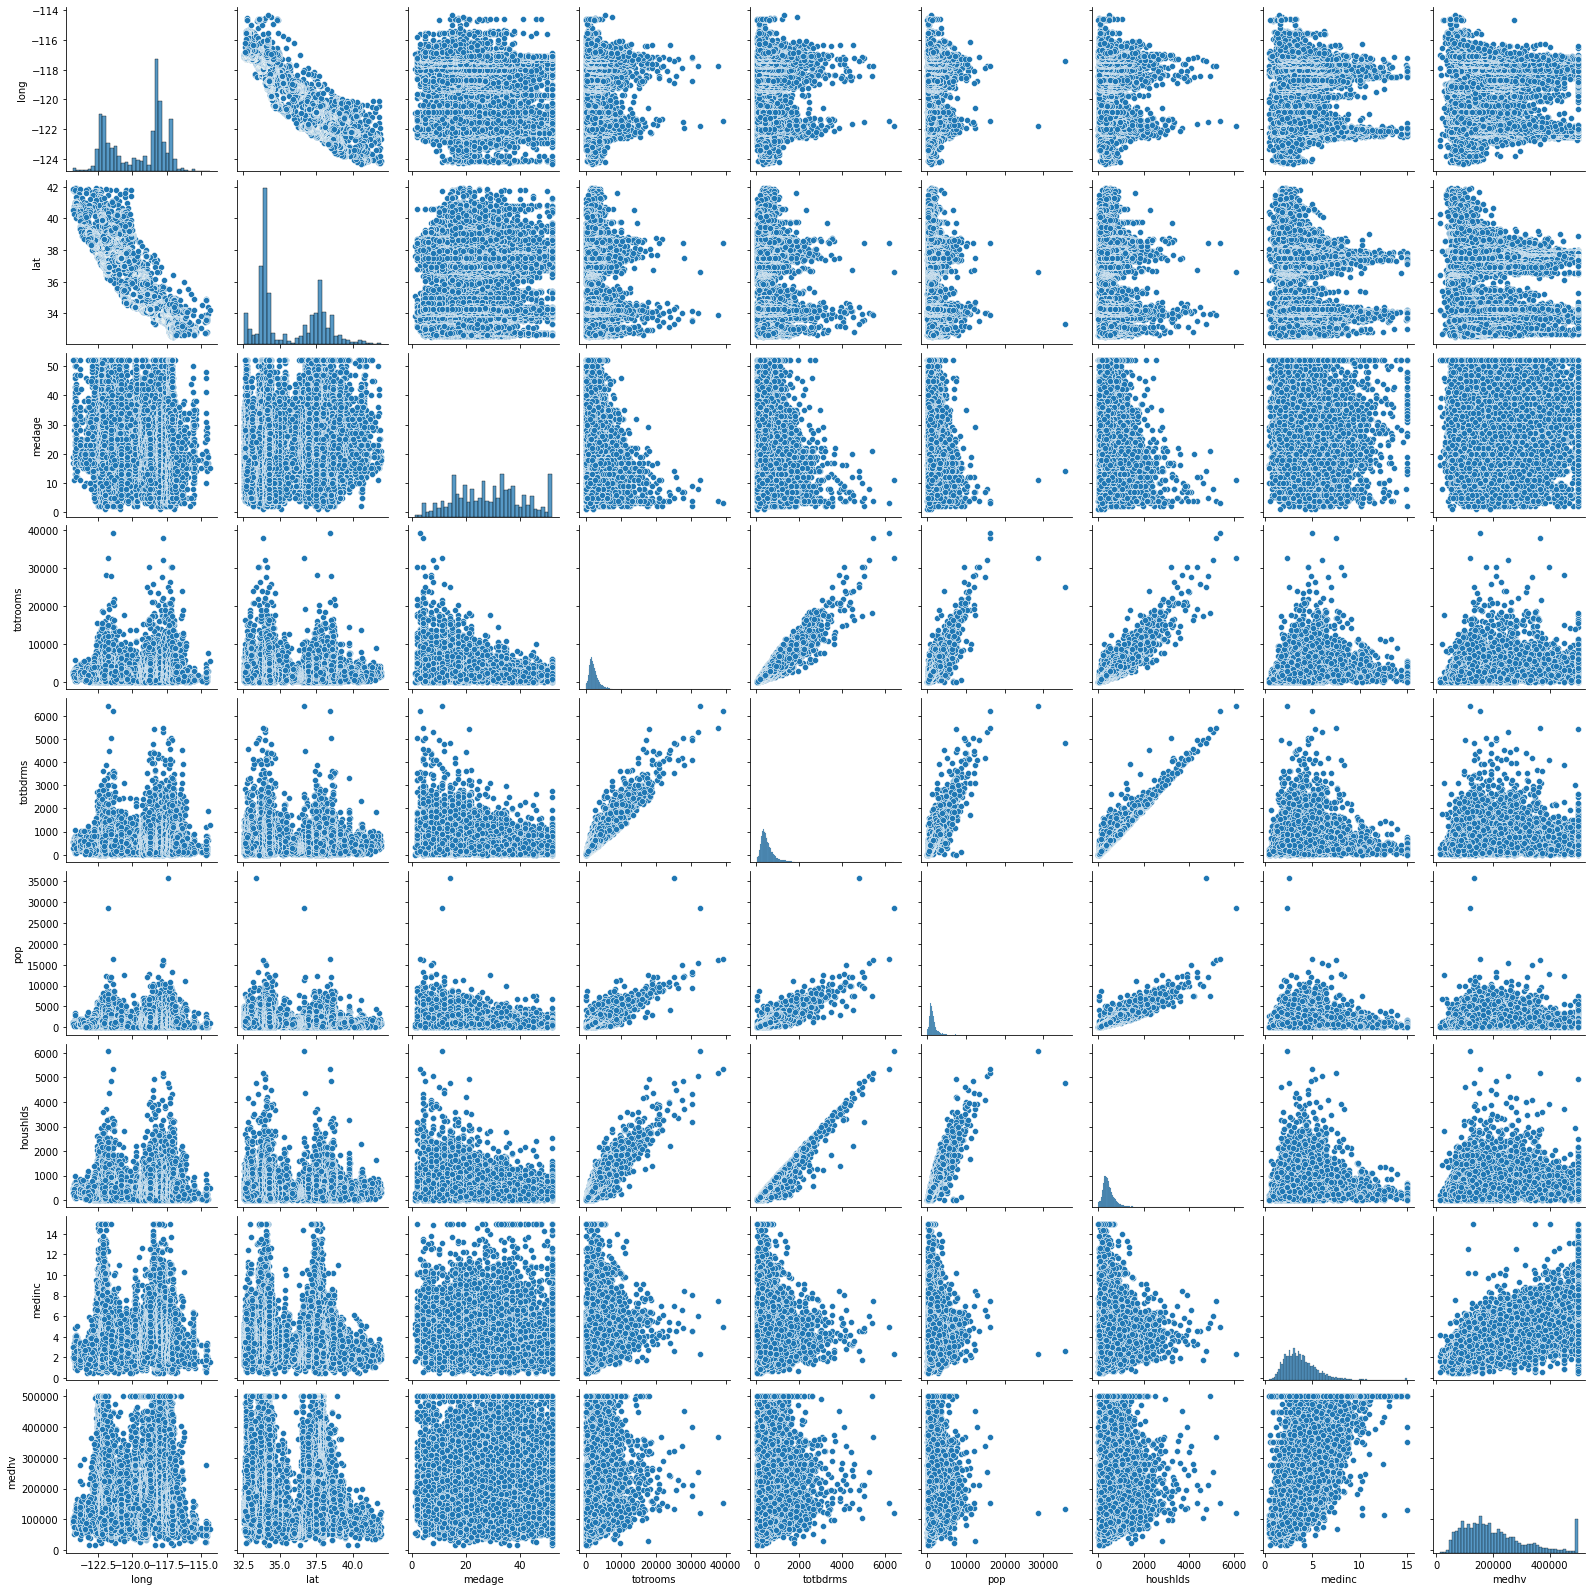

In [46]:
sns.pairplot(df.toPandas())

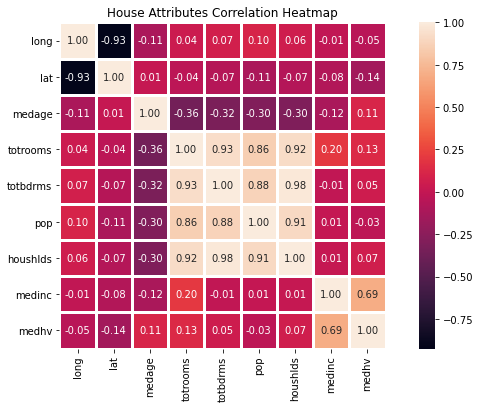

In [21]:
plt.figure(figsize=(12,6))
corr = df.toPandas().corr()
sns.heatmap(round(corr, 3), 
            annot=True, 
            fmt='.2f',
            square=True,
            linewidth=3,
            linecolor="white")
plt.title("House Attributes Correlation Heatmap")
plt.show()

In [22]:
dfnew=df.select(['medage','totrooms','medinc','medhv'])
dfnew.show(5)

+------+--------+------+--------+
|medage|totrooms|medinc|   medhv|
+------+--------+------+--------+
|  41.0|   880.0|8.3252|452600.0|
|  21.0|  7099.0|8.3014|358500.0|
|  52.0|  1467.0|7.2574|352100.0|
|  52.0|  1274.0|5.6431|341300.0|
|  52.0|  1627.0|3.8462|342200.0|
+------+--------+------+--------+
only showing top 5 rows



In [23]:
dfnew.toPandas().mean()

medage          28.639486
totrooms      2635.763184
medinc           3.870671
medhv       206855.812500
dtype: float32

In [24]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn
def z_score(df,threshold=1):
    mean, std = df.toPandas().mean(), df.toPandas().std()
    z_score = np.abs((df.toPandas() - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

In [25]:
z_score(dfnew,threshold=1)

z-score of 1 corresponds to a prob of 0.27%
Rejection medage      7640
totrooms    2613
medinc      4980
medhv       6155
dtype: int64 points


,medage,totrooms,medinc,medhv
0,True,True,False,False
1,True,False,False,False
2,False,True,False,False
3,False,True,True,False
4,False,True,True,False
...,...,...,...,...
20635,True,True,False,False
20636,True,True,True,False
20637,True,True,False,True
20638,True,True,False,False


z-score of 2 corresponds to a prob of 0.27%
Rejection medhv    1383
dtype: int64 points
z-score of 3 corresponds to a prob of 0.27%
Rejection medhv    0
dtype: int64 points


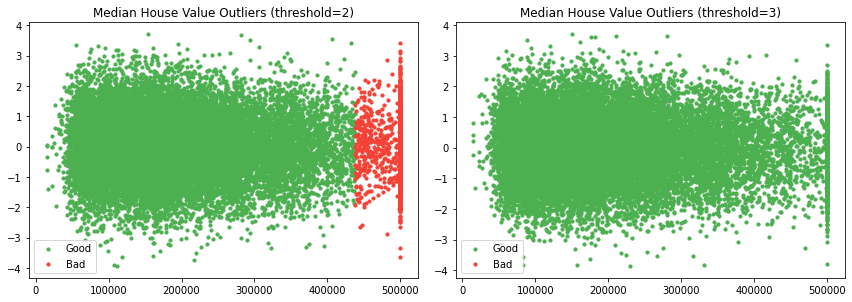

In [26]:
plt.figure(figsize=(12, 8))

for i, threshold in zip(range(1, 3), range(2, 4)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=dfnew.toPandas().shape[0])
    dfp=dfnew.select('medhv')
    good = z_score(dfp, threshold=threshold)
    good=good['medhv']
    dfp=dfp.toPandas()
    plt.scatter(dfp['medhv'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(dfp['medhv'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Median House Value Outliers (threshold={threshold})")

plt.tight_layout()

### Preprocessing

#### Target Values

I have seen that values of target need to convert like an example 452600.0 into 452600.0/100000=4.526

In [27]:
from pyspark.sql.functions import udf, col

In [28]:
dfnew = dfnew.withColumn("medhv", col("medhv")/100000)

In [29]:
dfnew.show(5)

+------+--------+------+-----+
|medage|totrooms|medinc|medhv|
+------+--------+------+-----+
|  41.0|   880.0|8.3252|4.526|
|  21.0|  7099.0|8.3014|3.585|
|  52.0|  1467.0|7.2574|3.521|
|  52.0|  1274.0|5.6431|3.413|
|  52.0|  1627.0|3.8462|3.422|
+------+--------+------+-----+
only showing top 5 rows



#### Feature Extraction

In [30]:
featureCols=["medage","totrooms","medinc"]

###### Use a VectorAssembler to put features into a feature vector column:

In [31]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

In [32]:
assembler=VectorAssembler(inputCols=featureCols, outputCol="features")

In [33]:
assembled_df=assembler.transform(dfnew)

In [34]:
assembled_df.show(5)

+------+--------+------+-----+--------------------+
|medage|totrooms|medinc|medhv|            features|
+------+--------+------+-----+--------------------+
|  41.0|   880.0|8.3252|4.526|[41.0,880.0,8.325...|
|  21.0|  7099.0|8.3014|3.585|[21.0,7099.0,8.30...|
|  52.0|  1467.0|7.2574|3.521|[52.0,1467.0,7.25...|
|  52.0|  1274.0|5.6431|3.413|[52.0,1274.0,5.64...|
|  52.0|  1627.0|3.8462|3.422|[52.0,1627.0,3.84...|
+------+--------+------+-----+--------------------+
only showing top 5 rows



#### Standardization

In [35]:
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")

In [36]:
scaled_df = standardScaler.fit(assembled_df).transform(assembled_df)

In [37]:
scaled_df.show(5,truncate=False)

+------+--------+------+-----+--------------------------------+---------------------------------------------------------+
|medage|totrooms|medinc|medhv|features                        |features_scaled                                          |
+------+--------+------+-----+--------------------------------+---------------------------------------------------------+
|41.0  |880.0   |8.3252|4.526|[41.0,880.0,8.325200080871582]  |[3.2577023016083064,0.40337085073160667,4.38209543579743]|
|21.0  |7099.0  |8.3014|3.585|[21.0,7099.0,8.301400184631348] |[1.668579227653035,3.2540109878905406,4.36956799913841]  |
|52.0  |1467.0  |7.2574|3.521|[52.0,1467.0,7.257400035858154] |[4.131719992283705,0.6724375432082579,3.820042673324032] |
|52.0  |1274.0  |5.6431|3.413|[52.0,1274.0,5.643099784851074] |[4.131719992283705,0.5839709816273487,2.970331231769803] |
|52.0  |1627.0  |3.8462|3.422|[52.0,1627.0,3.8461999893188477]|[4.131719992283705,0.7457776978867319,2.024505748166202] |
+------+--------+------+

#### Building a ML model with Spark ML

In [38]:
# setting random seed for notebook reproducability
rnd_seed=23
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

In [39]:
train_data, test_data = scaled_df.randomSplit([.8,.2], seed=rnd_seed)

###### Create an ElasticNet model:

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case:

\begin{align}
min_w\frac{1}{2n_{samples}}{\parallel{X_w - y}\parallel}^2_2 + \alpha\lambda{\parallel{X_w - y}\parallel}_1 + \frac{\alpha(1-\lambda)}{2}{\parallel{w}\parallel}^2_2
\end{align}

In [40]:
from pyspark.ml.regression import LinearRegression

In [45]:
## Initialize lr
lr = LinearRegression(featuresCol='features_scaled', labelCol="medhv", predictionCol='predmedhv',
                    maxIter=10, regParam=0.3, elasticNetParam=0.8,standardization=False)

In [46]:
# Fit the data to the model
linearmodel=lr.fit(train_data)

#### Evaluating the Model

With our model in place, we can generate predictions for our test data: use the transform() method to predict the labels for our test_data. Then, we can use RDD operations to extract the predictions as well as the true labels from the DataFrame

In [48]:
# Coefficients for the model
linearmodel.coefficients

DenseVector([0.0, 0.0, 0.5277])

In [49]:
# Intercept for the model
linearmodel.intercept

0.9933645741241458

In [53]:
# Generate predictions
predictions = linearmodel.transform(test_data)

In [54]:
# Extract the predictions and the "known" correct labels
prelabels = predictions.select("predmedhv", "medhv")

In [55]:
prelabels.show()

+------------------+-----+
|         predmedhv|medhv|
+------------------+-----+
|1.4447276338020534| 0.55|
|1.8708421537961173|4.347|
|1.8555929793808352|1.648|
|2.8379811811044893|  3.1|
|2.9194487835240004|2.985|
| 2.205822943224322|1.456|
| 2.259319951375046|1.233|
|2.6898786042779843| 2.19|
|2.3917844888455626|2.051|
| 2.906366180191849|3.052|
| 2.690822952720503| 1.81|
|2.4241715345611645|1.878|
|2.2692915027343603|1.743|
|2.4263102917350485|1.678|
| 2.554303014834631|2.716|
| 3.192877656683638|3.336|
| 2.102023354399858|1.205|
|1.8400105678433403|0.925|
|2.8822564214208772|2.849|
|2.1243276593427516|1.265|
+------------------+-----+
only showing top 20 rows



##### Inspect the Metrics

Looking at predictions values is always necessary. That one shows how your model learns the data and then the model's performance

In [56]:
# Summarize the model over the training set and print out some metrics
trainingSummary = linearmodel.summary

In [58]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)
print("MAE: %f" % trainingSummary.meanAbsoluteError)

numIterations: 6
objectiveHistory: [0.5, 0.4684169846636203, 0.3902798874021557, 0.3900922981290566, 0.3900918477701791, 0.3900918466889714, 0.39009184668637514]
+--------------------+
|           residuals|
+--------------------+
| -0.9304537531578683|
| -0.5423919854546477|
|  -0.281852576358673|
|  -2.000890836569463|
|  -1.105129399000846|
| -1.6598206312140773|
|  1.6620295628257065|
|     2.0291752840371|
|   1.017811732562571|
| -0.7411171287275726|
|  0.5830700125995563|
|   2.960361142526622|
|   2.041427188281488|
|  0.7445544853358883|
|  -1.127549702058201|
| -1.0530884526837494|
|-0.38240643480335046|
| -0.6846502227602829|
| -1.2865342861227893|
|-0.18849540067674164|
+--------------------+
only showing top 20 rows

RMSE: 0.881866
r2: 0.419620
MAE: 0.679589


###### There is definitely some improvements needed to have the best prediction !